In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
data = pd.read_csv(r'Breast_Cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,area_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,M,17.99,122.80,1001.0,0.11840,0.3001,0.14710,0.2419,153.40,25.38,184.60,2019.0,0.1622,0.7119,0.2654,0.4601
1,842517,M,20.57,132.90,1326.0,0.08474,0.0869,0.07017,0.1812,74.08,24.99,158.80,1956.0,0.1238,0.2416,0.1860,0.2750
2,84300903,M,19.69,130.00,1203.0,0.10960,0.1974,0.12790,0.2069,94.03,23.57,152.50,1709.0,0.1444,0.4504,0.2430,0.3613
3,84348301,M,11.42,77.58,386.1,0.14250,0.2414,0.10520,0.2597,27.23,14.91,98.87,567.7,0.2098,0.6869,0.2575,0.6638
4,84358402,M,20.29,135.10,1297.0,0.10030,0.1980,0.10430,0.1809,94.44,22.54,152.20,1575.0,0.1374,0.4000,0.1625,0.2364


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')

In [5]:
data.shape

(569, 17)

In [8]:
data = data.drop(columns=['id'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    object 
 1   radius_mean           569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   smoothness_mean       569 non-null    float64
 5   concavity_mean        569 non-null    float64
 6   concave points_mean   569 non-null    float64
 7   symmetry_mean         569 non-null    float64
 8   area_se               569 non-null    float64
 9   radius_worst          569 non-null    float64
 10  perimeter_worst       569 non-null    float64
 11  area_worst            569 non-null    float64
 12  smoothness_worst      569 non-null    float64
 13  concavity_worst       569 non-null    float64
 14  concave points_worst  569 non-null    float64
 15  symmetry_worst        5

In [10]:
data.describe()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,area_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.096360,0.088799,0.048919,0.181162,40.337079,16.269190,107.261213,880.583128,0.132369,0.272188,0.114606,0.290076
std,3.524049,24.298981,351.914129,0.014064,0.079720,0.038803,0.027414,45.491006,4.833242,33.602542,569.356993,0.022832,0.208624,0.065732,0.061867
min,6.981000,43.790000,143.500000,0.052630,0.000000,0.000000,0.106000,6.802000,7.930000,50.410000,185.200000,0.071170,0.000000,0.000000,0.156500
25%,11.700000,75.170000,420.300000,0.086370,0.029560,0.020310,0.161900,17.850000,13.010000,84.110000,515.300000,0.116600,0.114500,0.064930,0.250400
50%,13.370000,86.240000,551.100000,0.095870,0.061540,0.033500,0.179200,24.530000,14.970000,97.660000,686.500000,0.131300,0.226700,0.099930,0.282200
75%,15.780000,104.100000,782.700000,0.105300,0.130700,0.074000,0.195700,45.190000,18.790000,125.400000,1084.000000,0.146000,0.382900,0.161400,0.317900
max,28.110000,188.500000,2501.000000,0.163400,0.426800,0.201200,0.304000,542.200000,36.040000,251.200000,4254.000000,0.222600,1.252000,0.291000,0.663800


In [11]:
data.isna().sum()

diagnosis               0
radius_mean             0
perimeter_mean          0
area_mean               0
smoothness_mean         0
concavity_mean          0
concave points_mean     0
symmetry_mean           0
area_se                 0
radius_worst            0
perimeter_worst         0
area_worst              0
smoothness_worst        0
concavity_worst         0
concave points_worst    0
symmetry_worst          0
dtype: int64

In [12]:
data.isna().sum()

diagnosis               0
radius_mean             0
perimeter_mean          0
area_mean               0
smoothness_mean         0
concavity_mean          0
concave points_mean     0
symmetry_mean           0
area_se                 0
radius_worst            0
perimeter_worst         0
area_worst              0
smoothness_worst        0
concavity_worst         0
concave points_worst    0
symmetry_worst          0
dtype: int64

In [13]:
le = preprocessing.LabelEncoder()

df = (data.apply(le.fit_transform))

In [14]:
df

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,area_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,370,455,452,444,521,526,416,515,425,497,516,358,520,483,485
1,1,426,486,513,120,321,396,219,450,419,465,511,158,278,401,222
2,1,406,478,487,403,478,516,348,476,399,455,491,287,438,468,445
3,1,98,164,95,471,507,493,426,281,215,281,194,408,511,479,499
4,1,418,493,506,332,480,492,216,477,381,453,470,239,415,363,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,438,503,522,410,509,522,173,518,426,480,518,263,423,453,21
565,1,413,483,499,295,415,483,187,483,401,459,493,116,350,364,152
566,1,340,410,421,115,329,335,94,397,328,390,413,106,366,317,40
567,1,429,500,501,442,530,531,413,464,431,497,502,367,534,482,472


In [15]:
df.corr()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,area_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst
diagnosis,1.000000,0.742827,0.747092,0.734770,0.372423,0.732390,0.779702,0.334370,0.721573,0.793618,0.785825,0.785522,0.426936,0.704746,0.779755,0.397952
radius_mean,0.742827,1.000000,0.995636,0.998156,0.160984,0.653984,0.768864,0.128979,0.757137,0.978884,0.969468,0.977448,0.133004,0.600307,0.732001,0.177525
perimeter_mean,0.747092,0.995636,1.000000,0.996984,0.183623,0.679614,0.788028,0.148716,0.750500,0.980044,0.979124,0.981099,0.155454,0.631062,0.755436,0.199524
area_mean,0.734770,0.998156,0.996984,1.000000,0.141610,0.642225,0.756440,0.114283,0.749380,0.978752,0.971694,0.980467,0.119888,0.593589,0.722511,0.171499
smoothness_mean,0.372423,0.160984,0.183623,0.141610,1.000000,0.517615,0.567139,0.533066,0.296261,0.210766,0.221997,0.192574,0.800043,0.430257,0.500685,0.389136
concavity_mean,0.732390,0.653984,0.679614,0.642225,0.517615,1.000000,0.927381,0.448624,0.649093,0.686228,0.714769,0.674262,0.490080,0.938586,0.904064,0.384047
concave points_mean,0.779702,0.768864,0.788028,0.756440,0.567139,0.927381,1.000000,0.426771,0.734248,0.792950,0.809138,0.780010,0.493074,0.827513,0.936857,0.357440
symmetry_mean,0.334370,0.128979,0.148716,0.114283,0.533066,0.448624,0.426771,1.000000,0.293504,0.169005,0.183739,0.153367,0.426998,0.396517,0.399128,0.711928
area_se,0.721573,0.757137,0.750500,0.749380,0.296261,0.649093,0.734248,0.293504,1.000000,0.788616,0.767293,0.780850,0.191212,0.505149,0.624908,0.158202
radius_worst,0.793618,0.978884,0.980044,0.978752,0.210766,0.686228,0.792950,0.169005,0.788616,1.000000,0.991621,0.997703,0.224253,0.657519,0.782778,0.259271


M: 212
B: 357


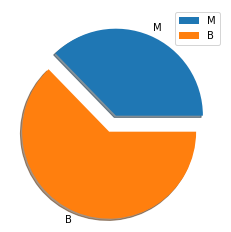

In [16]:
df_mal = len(df['diagnosis'][df.diagnosis == 1])
df_ben = len(df['diagnosis'][df.diagnosis == 0])

print('M:', df_mal)
print('B:', df_ben)

arr = np.array([df_mal, df_ben])

labels = ['M', 'B']

plt.pie(arr, labels=labels, explode=[0.0, 0.2], shadow=True)
plt.legend()

In [17]:
from sklearn.model_selection import train_test_split

x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 15)
(114, 15)
(455,)
(114,)


In [18]:
# scaler = preprocessing.StandardScaler().fit(x_train)

# scaled_x = scaler.transform(x_train)

# scaled_x

In [19]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(StandardScaler(), LogisticRegression()).fit(x_train, y_train)

In [20]:
lr_pred = lr.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, lr_pred))

Accuracy: 0.9473684210526315


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

def evaluation_model(y_test, y_pred):
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

In [23]:
evaluation_model(y_test, lr_pred)

Accuracy Score: 0.9473684210526315
Precision Score: 0.9333333333333333
Recall Score: 0.9333333333333333
Confusion Matrix:
 [[66  3]
 [ 3 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        69
           1       0.93      0.93      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [24]:
import joblib

joblib.dump(lr, 'breast-cancer.pkl')

['breast-cancer.pkl']